<a href="https://colab.research.google.com/github/MaCoZu/NLP/blob/main/01_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
%matplotlib inline

In [125]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

# Load MNIST Dataset

In [126]:
(dataset_train_original, dataset_validate_original, dataset_test_original), info = tfds.load(
                     "mnist",
                     as_supervised=True,
                     split=['train','test[:50%]','test[50%:]'], # train, test, validate
                     with_info=True,
                   )
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

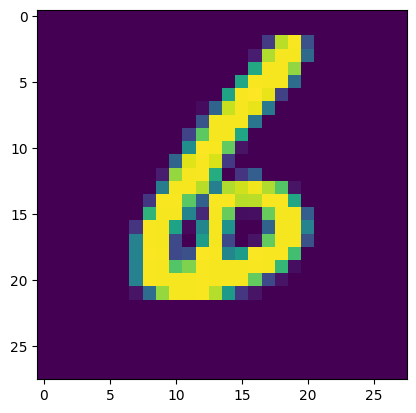

In [127]:
for x, y in dataset_train_original.shuffle(60000).take(2):
  plt.imshow(x)

# Pipelines

In [128]:
def encode(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32)
  return image, label

dataset = dataset_train_original.map(lambda image, label: encode(image, label) )

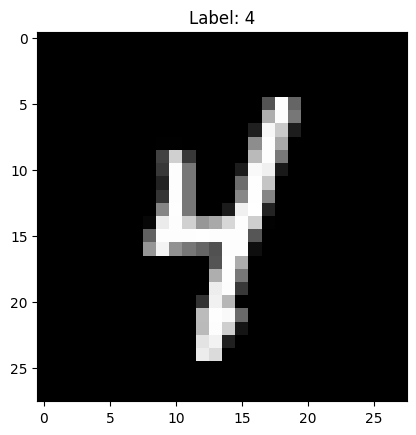

In [129]:
for image, label in dataset.take(1):
  plt.imshow(image, cmap='gray')
  plt.title(f'Label: {label}')
  # print(image.dtype)
  plt.show()

In [130]:
dataset_train = dataset_train_original.map(lambda x, y: encode(x,y)).cache()\
                                      .shuffle(60_000).batch(128)

dataset_validate = dataset_validate_original.map(lambda x, y: encode(x, y)).cache()\
                                            .batch(128)

dataset_test = dataset_test_original.map(lambda x, y: encode(x,y)).cache().batch(128)

for x, y in dataset_train.take(1):
  print(x.shape)
  print(y.shape)

(128, 28, 28, 1)
(128,)


# Model

In [132]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # bc. there is multiple classes
    metrics=['accuracy']
    )

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


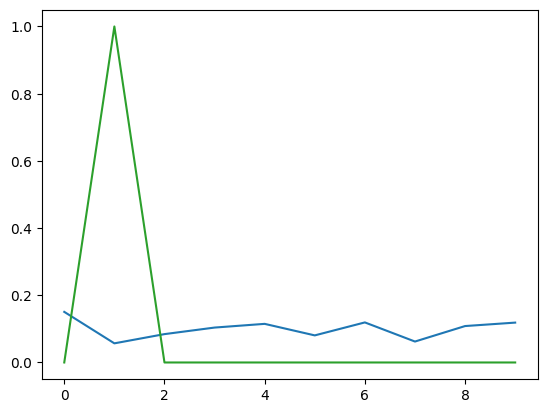

In [133]:
for x_batch, y_batch in dataset_train.take(1):
  prediction = model.predict(x_batch, verbose=0)
  index=0
  #print(prediction.shape)
  plt.plot(prediction[index])
  plt.plot(y_batch[index])
  y_batch_onehot = tf.keras.utils.to_categorical(y_batch)
  plt.plot(y_batch_onehot[index])
  plt.show()

In [ ]:
model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_validate
)

In [135]:
model.save("model.h5")

In [136]:
loaded_model = models.load_model("model.h5")
loaded_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

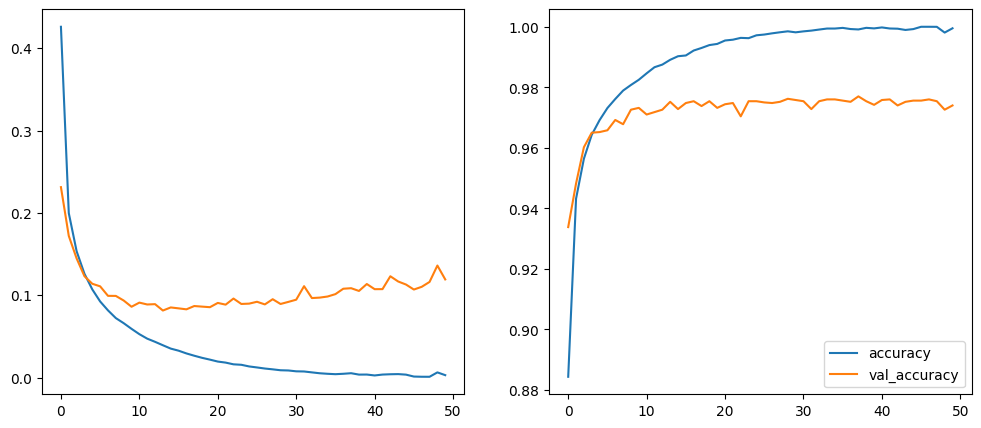

In [158]:
def render_history(history):
  assert isinstance(history,  dict), f"Expected dict, but got {type(history)}"

  plt.figure(figsize=(12, 5))

  ax1 = plt.subplot(121)
  ax1.plot(history["loss"], label="loss")
  ax1.plot(history["val_loss"], label='val_loss')

  ax2 = plt.subplot(122)
  ax2.plot(history["accuracy"], label='accuracy')
  ax2.plot(history["val_accuracy"], label='val_accuracy')

  plt.legend()
  plt.show()

render_history(model.history.history)

In [ ]:
# test
loss, accuracy = loaded_model.evaluate(dataset_test)
loss, accuracy

In [ ]:
# todo: create a gridsearch

from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(neurons=64):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Define the parameter grid for the grid search
param_grid = {'neurons': [32, 64, 128, 256]} # You can adjust these values


# Perform the grid search
grid_search.fit(dataset_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)